In [3]:
import netCDF4
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# question 1

In [70]:
ds=xr.open_dataset("200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc",engine="netcdf4")

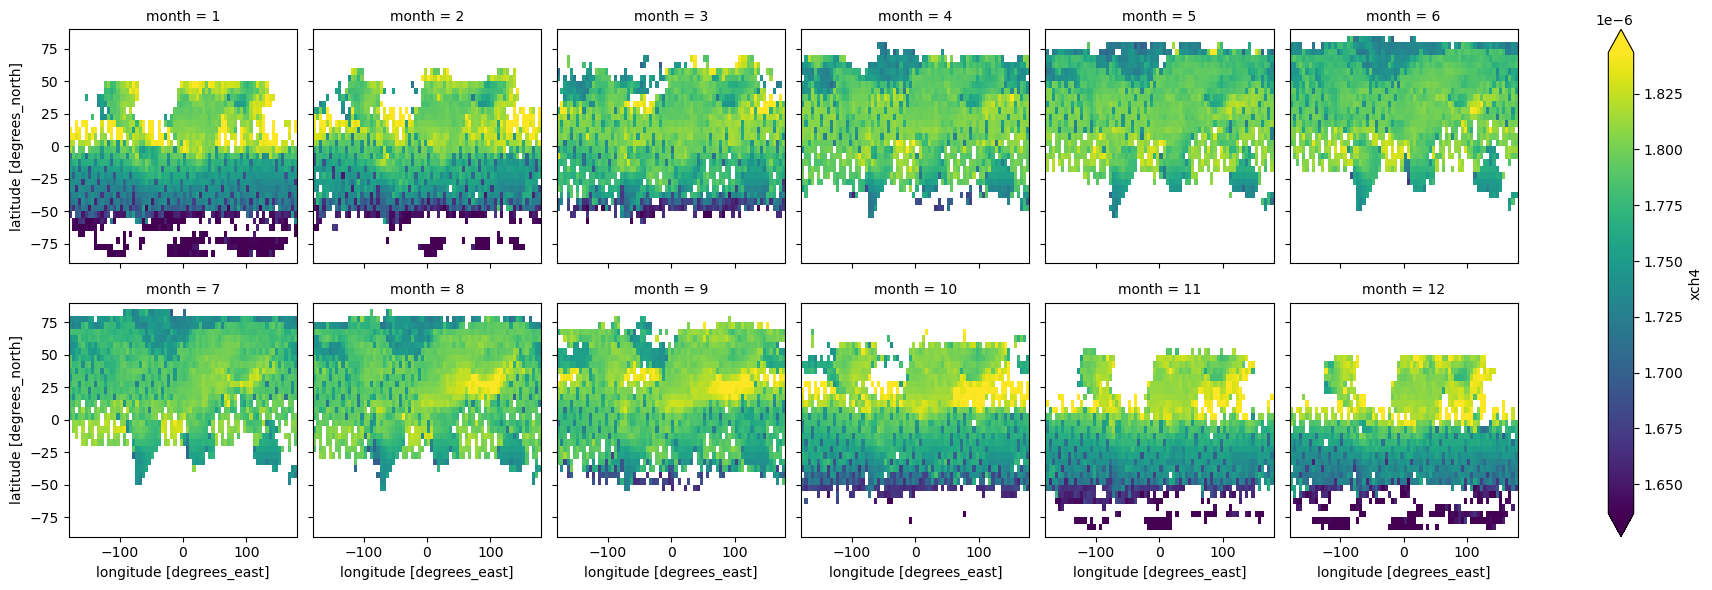

In [71]:
ch4_clim =ds.xch4.groupby('time.month').mean()
ch4_clim.plot(col="month", col_wrap=6, robust=True)

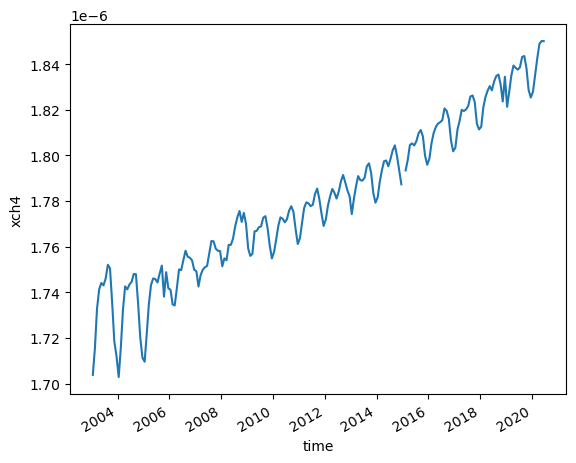

In [81]:
timelist=ds.xch4.sel(time=slice("2003-01","2020-06")).mean(["lon","lat"])
timelist.plot()
#lat=slice(-5, 5),lon=slice(-170,-120),

Global methane concentrations are fluctuating and may fluctuate in the short term, such as one to two years, but the overall trend has been increasing

D:\anaconda\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
D:\anaconda\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


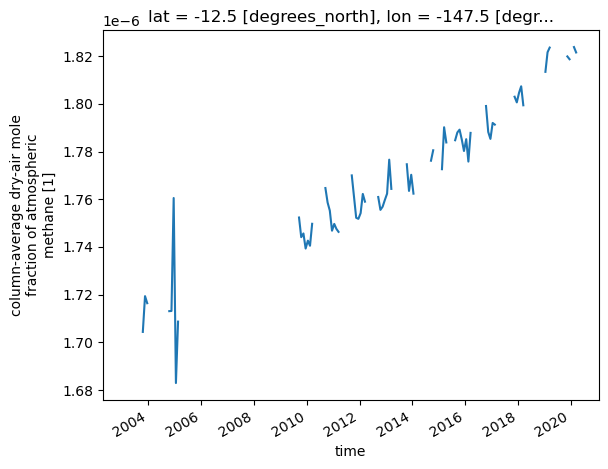

In [74]:
sitelist=ds.xch4.sel(lon=-150, lat=-15,method='nearest')

sitelist.plot()

Because data for this coordinate cannot be found for some time periods, the line chart looks choppy

# question 2

In [76]:
data = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4").sst.sel(lon=slice(10, 60),lat=slice(-5,5))

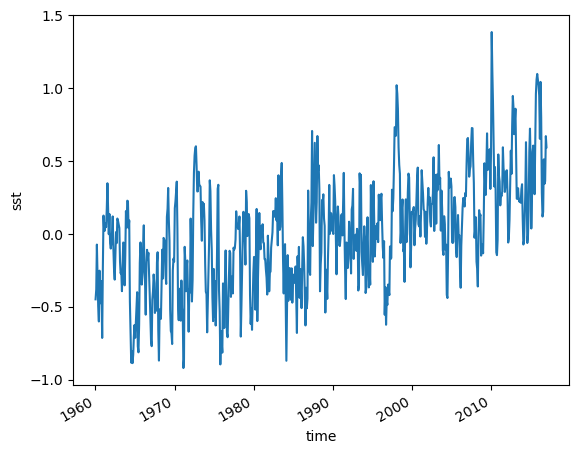

In [77]:
#monthly anomaly
monthdata=data.groupby("time.month")
ano_series=monthdata-monthdata.mean(dim="time")
ano_series.mean(dim=['lon','lat']).plot()

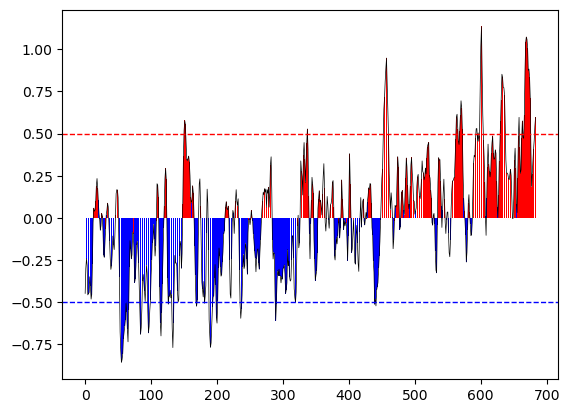

In [78]:
sst=ano_series.mean(dim=['lon','lat']).data
sst_3=[]
time=ano_series.mean(dim=['lon','lat']).time.data
for i in range(0,len(sst)):
    if i==0 or i==len(sst)-1:
        sst_3.append(sst[i])
    else:
        sst_3.append((sst[i-1]+sst[i]+sst[i+1])/3)
# plt.plot(time,sst_3,color='black')
sst_3=np.array(sst_3)
sst_3z=np.where(sst>0,sst_3,np.NAN)
sst_3f=np.where(sst<0,sst_3,np.NAN)
plt.bar(range(len(time)),sst_3z,color='red')
plt.bar(range(len(time)),sst_3f,color='blue')
plt.plot(range(len(time)),sst_3,color='black',linewidth=0.5)
plt.axhline(y=0.5,linestyle='--',linewidth=1, color='red')
plt.axhline(y=-0.5,linestyle='--',linewidth=1, color='blue')
plt.show()

The time coordinates are not set because the following problem occurs when using the time position x coordinate - the bar chart is not fully displayed, and I have not solved this problem yet

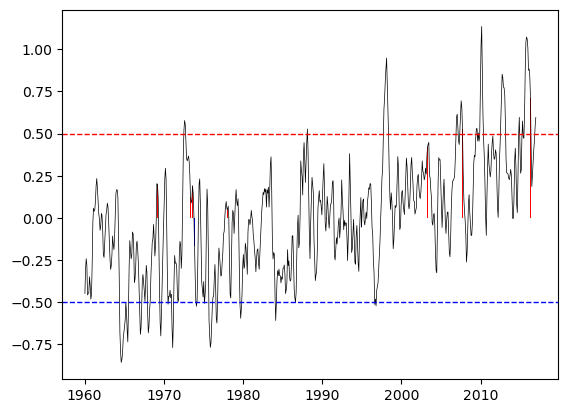

In [82]:
sst=ano_series.mean(dim=['lon','lat']).data
sst_3=[]
time=ano_series.mean(dim=['lon','lat']).time.data
for i in range(0,len(sst)):
    if i==0 or i==len(sst)-1:
        sst_3.append(sst[i])
    else:
        sst_3.append((sst[i-1]+sst[i]+sst[i+1])/3)
# plt.plot(time,sst_3,color='black')
sst_3=np.array(sst_3)
sst_3z=np.where(sst>0,sst_3,np.NAN)
sst_3f=np.where(sst<0,sst_3,np.NAN)
plt.bar(time,sst_3z,color='red')
plt.bar(time,sst_3f,color='blue')
plt.plot(time,sst_3,color='black',linewidth=0.5)
plt.axhline(y=0.5,linestyle='--',linewidth=1, color='red')
plt.axhline(y=-0.5,linestyle='--',linewidth=1, color='blue')
plt.show()

# question 3

In [69]:
ds = xr.open_dataset("CESM2_200001-201412.nc", engine="netcdf4")

D:\anaconda\lib\site-packages\xarray\conventions.py:512: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


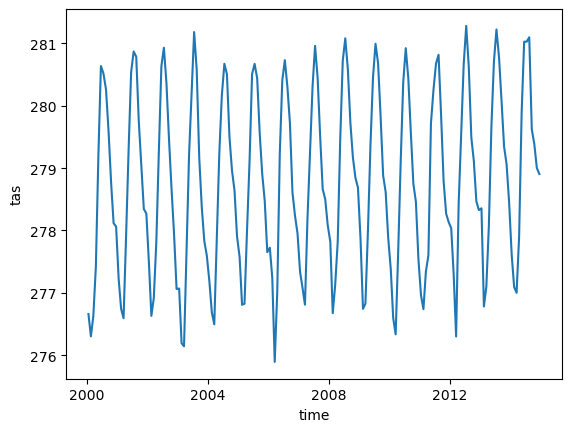

In [10]:
tas_clim = ds.tas.groupby('time.month').mean(dim=['lon','lat'])
tas_clim.plot()

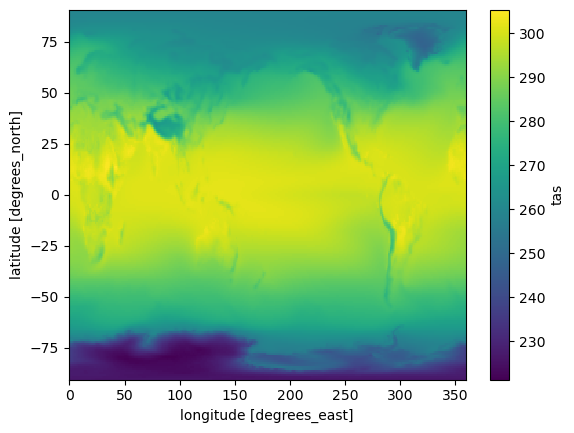

In [11]:
#average tas from 2000.01-2014.12
#figure 1
tas_mean=ds.tas.mean(dim='time')
tas_mean.plot()

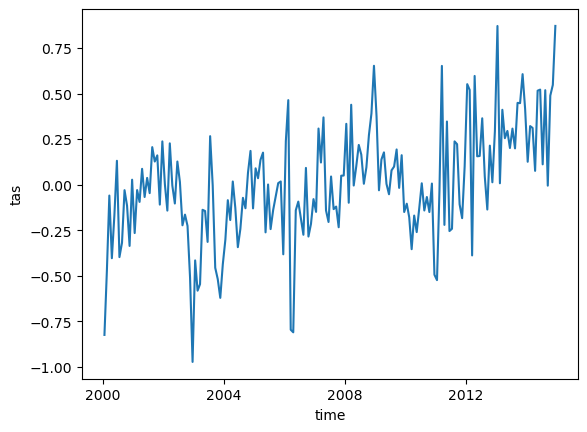

In [14]:
#monthly anomaly
#figure 2
monthdata=ds.tas.groupby("time.month")
ano_series=monthdata-monthdata.mean(dim="time")
ano_series.mean(dim=['lon','lat']).plot()

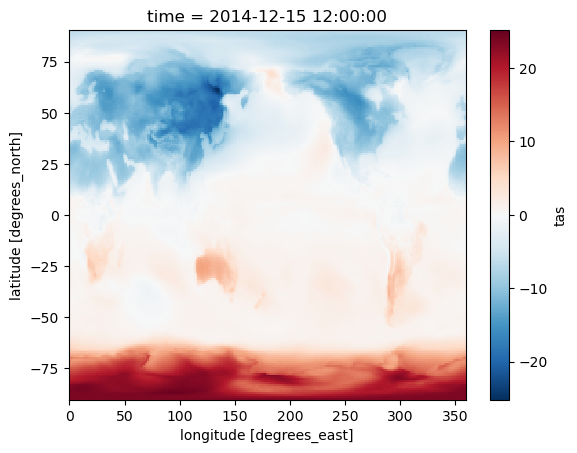

In [20]:
#latest day's tas anomaly
#figure 3
time_1=ds.tas.isel(time=-1)
time_1_ano=time_1-ds.tas.mean(dim=['time'])
time_1_ano.plot()

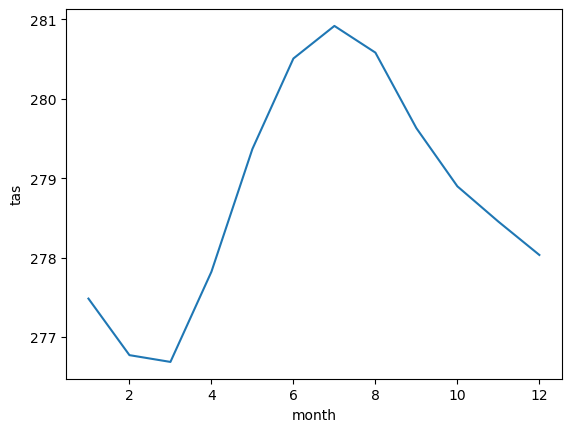

In [27]:
#the average change in different months from 2000 to 2014
#figure 4
ds.tas.groupby('time.month').mean(dim=['lon','lat',"time"]).plot()

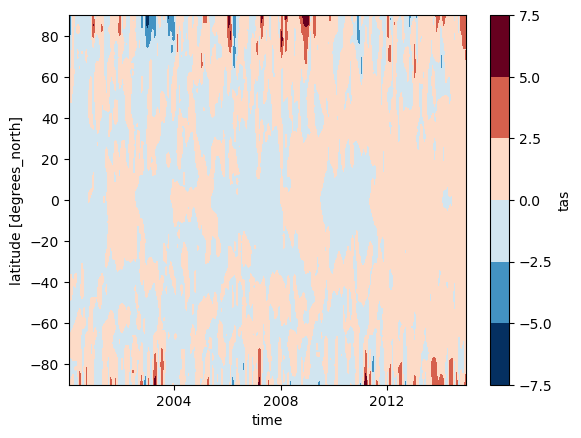

In [72]:
#monthly anomaly in latitude 
#figure 5
monthdata=ds.tas.groupby("time.month")
ano_series=monthdata-monthdata.mean(dim="time")
ano_series.mean(dim=['lon']).transpose().plot.contourf()